In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf

In [20]:
np.random.seed(101)

In [21]:
df = pd.read_csv(r"DFM Fitted Values.csv")

In [22]:
df.dropna(inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,BSE,NYSE,N225,DAX,SS.Shanghai
0,-0.017400,0.144070,-0.101233,0.223397,0.022127
1,0.018385,0.156515,0.480594,0.010359,0.086725
2,-0.103268,-0.125982,-0.636632,-0.228084,-0.155282
3,0.210422,0.287996,0.318073,0.164632,0.129614
4,-0.350826,0.028996,-0.566664,-0.342187,-0.303373


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop(['BSE'],axis=1)
y = df['BSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [25]:
feat_cols=[]
for cols in df.columns[1:5]:
    column=tf.feature_column.numeric_column(cols)
    feat_cols.append(column)
    
print(feat_cols)

[_NumericColumn(key='NYSE', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='N225', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='DAX', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='SS.Shanghai', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [26]:
df.columns[1:5]

Index(['NYSE', 'N225', 'DAX', 'SS.Shanghai'], dtype='object')

In [27]:
model = tf.estimator.DNNRegressor(hidden_units=[10,6,8,5,8,10],feature_columns=feat_cols)

#input function
input_f = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\hrish\\AppData\\Local\\Temp\\tmpcbm2z3_7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E5EB2DBCC0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [28]:
model.train(input_fn=input_f,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\hrish\AppData\Local\Temp\tmpcbm2z3_7\model.ckpt.
INFO:tensorflow:loss = 0.043917485, step = 1
INFO:tensorflow:global_step/sec: 262.619
INFO:tensorflow:loss = 0.019153206, step = 101 (0.389 sec)
INFO:tensorflow:global_step/sec: 341.493
INFO:tensorflow:loss = 0.018583227, step = 201 (0.290 sec)
INFO:tensorflow:global_step/sec: 374.746
INFO:tensorflow:loss = 0.023650829, step = 301 (0.268 sec)
INFO:tensorflow:global_step/sec: 373.019
INFO:tensorflow:loss = 0.025434904, step = 401 (0.269 sec)
INFO:tensorflow:global_step/sec: 394.006
INFO:tensorflow:loss = 0.015338442, step = 501 (0.261 sec)
INFO:tensorflow:global_step/sec: 332.88
INFO:tensorflow:loss = 0.016133433, step = 601 (0.291 sec)
INFO:tensorflow

In [29]:
train_metrics = model.evaluate(input_fn = input_f,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-07-20-16:52:24
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hrish\AppData\Local\Temp\tmpcbm2z3_7\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-07-20-16:52:28
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.0034340217, global_step = 1000, label/mean = 0.0014391317, loss = 0.034340218, prediction/mean = 0.02275109
INFO:tensorflow:Saving 'check

In [30]:
pred_f = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=20,num_epochs=1,shuffle=False)
pred = model.predict(input_fn=pred_f)

predictions=list(pred)
final_pred=[]
for pred in predictions:
    final_pred.append(pred["predictions"])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hrish\AppData\Local\Temp\tmpcbm2z3_7\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [31]:
predictions
# a library of arrays

[{'predictions': array([-0.05400749], dtype=float32)},
 {'predictions': array([-0.00736049], dtype=float32)},
 {'predictions': array([-0.10783762], dtype=float32)},
 {'predictions': array([-0.00940461], dtype=float32)},
 {'predictions': array([-0.01268746], dtype=float32)},
 {'predictions': array([0.05518188], dtype=float32)},
 {'predictions': array([0.05802847], dtype=float32)},
 {'predictions': array([-0.08076781], dtype=float32)},
 {'predictions': array([-0.07787026], dtype=float32)},
 {'predictions': array([0.13627963], dtype=float32)},
 {'predictions': array([0.04111995], dtype=float32)},
 {'predictions': array([0.14719178], dtype=float32)},
 {'predictions': array([-0.00805752], dtype=float32)},
 {'predictions': array([-0.04584162], dtype=float32)},
 {'predictions': array([0.03125595], dtype=float32)},
 {'predictions': array([0.02462099], dtype=float32)},
 {'predictions': array([0.01819073], dtype=float32)},
 {'predictions': array([-0.00093354], dtype=float32)},
 {'predictions': a

In [32]:
final_pred

[array([-0.05400749], dtype=float32),
 array([-0.00736049], dtype=float32),
 array([-0.10783762], dtype=float32),
 array([-0.00940461], dtype=float32),
 array([-0.01268746], dtype=float32),
 array([0.05518188], dtype=float32),
 array([0.05802847], dtype=float32),
 array([-0.08076781], dtype=float32),
 array([-0.07787026], dtype=float32),
 array([0.13627963], dtype=float32),
 array([0.04111995], dtype=float32),
 array([0.14719178], dtype=float32),
 array([-0.00805752], dtype=float32),
 array([-0.04584162], dtype=float32),
 array([0.03125595], dtype=float32),
 array([0.02462099], dtype=float32),
 array([0.01819073], dtype=float32),
 array([-0.00093354], dtype=float32),
 array([-0.09342873], dtype=float32),
 array([-0.0827565], dtype=float32),
 array([-0.0267936], dtype=float32),
 array([-0.01326726], dtype=float32),
 array([-0.12861302], dtype=float32),
 array([0.07665564], dtype=float32),
 array([-0.01863198], dtype=float32),
 array([-0.0402216], dtype=float32),
 array([-0.07009003], dt

In [33]:
error =[]; j=0; u=[]
for i in y_test.index:
    if(y_test[i] != 0):
        ee = ((y_test[i]-final_pred[j])/y_test[i])*100
        error.append(ee)
    j=j+1

In [34]:
np.mean(error)

-599.2611

In [35]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,final_pred))

0.05877530422362092

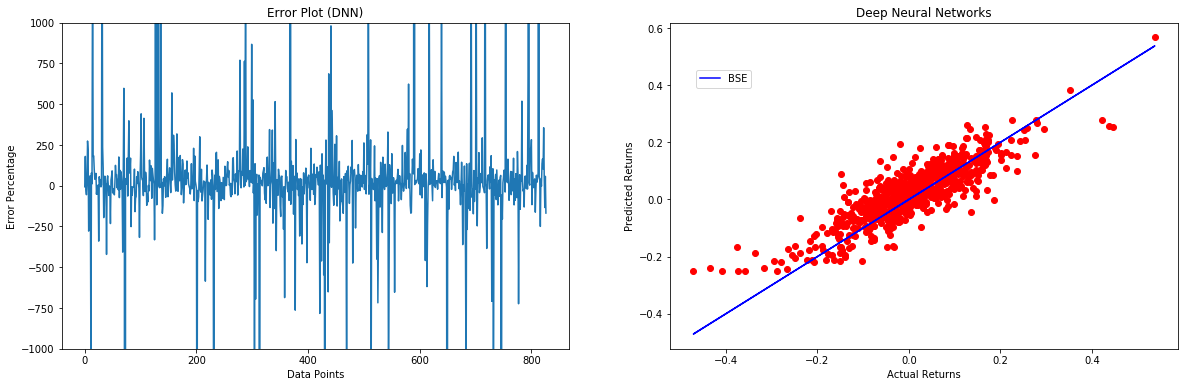

In [36]:
fig, axes = plt.subplots(1,2,figsize =(20,6))

axes[0].plot(range(0,len(error)),error)
axes[1].plot(y_test,final_pred,'ro')
axes[1].plot(y_test,y_test,'b')

axes[0].set_ylim(-1000,1000)
axes[0].set_ylabel('Error Percentage')
axes[0].set_xlabel('Data Points')
axes[0].set_title('Error Plot (DNN)')

axes[1].set_xlabel('Actual Returns')
axes[1].set_ylabel('Predicted Returns')
axes[1].set_title('Deep Neural Networks')
axes[1].legend(loc = (0.05,0.8))